# Принятие решений в бизнесе на основе данных

**Заказчик**

Интернет-магазин

**Цель проекта**

- Необходимость приоритизировать гипотезы из списка гипотез, предоставленных отделом Маркетинга;

- Анализа результатов проведенного А/В-тестирования и аргументация решения по результатам теста.

Варианты решений:

- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

**План**

1. Подготовка данных к анализу
- Загрузить данные из таблиц, провести первичный анализ
- Оптимизировать данные для анализа (поиск дублей, анализ пропусков, проверка названий столбцов и т.п.)
- Проверка/корректировка типов данных
2. Приоритизация гипотез
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.
3. Анализ A/B-теста
- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
4. Статистическая значимость
- Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

**Описание данных**

**Данные для первой части**

Файл `/datasets/hypothesis.csv`. 

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение `Efforts`, тем дороже проверка гипотезы.

**Данные для второй части**

Файл `/datasets/orders.csv`. 

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`. 

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Подготовка данных к анализу

Осуществим импорт необходимых библиотек.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy.stats as stats
import numpy as np
from scipy import stats as st
import datetime as dt
from scipy.stats import mannwhitneyu

In [2]:
# Установим  максимальное количество отображаемых столбцов при выводе df. 
pd.set_option('display.max_columns', None)

In [3]:
# Установим максимальное количество отображаемых строк при выводе df.
pd.set_option('display.max_rows', None)

In [4]:
# Установим количество знаков после запятой для числовых данных при выводе df до двух.
pd.set_option('display.precision',2)

In [5]:
# Для выведения названий гипотиз целиком.
pd.set_option('display.max_colwidth', False)

Загрузим таблицы и проанализируем их содержимое.

In [6]:
# Данные для первой части
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [7]:
# Данные для второй части
orders = pd.read_csv('/datasets/orders.csv')

In [8]:
# Данные для второй части
visitors = pd.read_csv('/datasets/visitors.csv')

**df 'hypothesis'** 

In [9]:
# Отобразим первые пять строк df 'hypothesis'
display(hypothesis.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [10]:
# Выведем краткую информацию о df 'hypothesis'
display(hypothesis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

- Количество записей: 9, количество столбцов: 5
- Столбцы: Hypothesis (тип данных: object), Reach (тип данных: int64), Impact (тип данных: int64), Confidence (тип данных: int64), Efforts (тип данных: int64)
- Не содержат пропусков: Все столбцы имеют по 9 непустых значений.
- В четырех столбцах (Reach, Impact, Confidence, Efforts) хранятся целочисленные значения (int64), а в одном столбце (Hypothesis) хранятся строковые значения (object).
- Все данные представлены в корректном формате, отсутствуют пропущенные значения.

In [11]:
# Выведем основные статистические характеристик числовых столбцов df 'hypothesis'
display(hypothesis.describe())

,Reach,Impact,Confidence,Efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


- Во всех столбцах наблюдается большой диапазон значений от минимального до максимального (от 1 до 10). Это может указывать на наличие как очень низких, так и очень высоких значений.
- Значения стандартных отклонений (особенно для Reach, Impact, и Efforts) довольно высоки. Это свидетельствует о большой разбросанности данных вокруг среднего значения.
- Неравномерное распределение: Reach и Impact имеют одинаковое среднее и стандартное отклонение, а также очень широкий диапазон значений. Это может указывать на то, что в данных есть как низкие, так и высокие значения. Confidence имеет более высокий средний уровень и стандартное отклонение, что может указывать на большую вариативность уверенности в гипотезах. Efforts имеет схожие характеристики с Reach и Impact, но с меньшим стандартным отклонением.
- Наличие значений 1 и 10 в Reach, Impact, Confidence, и Efforts указывает на потенциальные аномалии. Значения 1 (очень низкое) и 10 (очень высокое) могут быть исключениями или ошибками данных, которые стоит рассмотреть отдельно.
- Квартильные значения показывают, что большинство данных сосредоточено в пределах квартилей 25% и 75%, но присутствуют и значения за пределами этого диапазона, что подтверждает наличие аномалий.

In [12]:
# Проверим количество дубликатов df 'hypothesis'
print('Количество дубликатов:', hypothesis.duplicated().sum())

Количество дубликатов: 0


In [13]:
# Проведем замену регистра заголовков df 'hypothesis'
hypothesis_columns = (hypothesis.columns).str.lower()

In [14]:
hypothesis.columns=hypothesis_columns

In [15]:
# Проверим проведенную замену регистра df 'hypothesis'
hypothesis.sample()

,hypothesis,reach,impact,confidence,efforts
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


**df 'orders'**

In [16]:
# Отобразим первые пять строк df 'orders'
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [17]:
# Выведем краткую информацию о df 'orders'
display(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

- df имеет 1197 строк и 5 столбцов.
- transactionId (идентификатор заказа), visitorId (идентификатор пользователя), revenue (ыручка заказа) - тип данных int64;  date (дата, когда был совершён заказ) и group (группа A/B-теста, в которую попал заказ) - тип данных object.
- Все столбцы содержат непустые значения, что означает, что нет пропущенных данных.
- Требуется преобразование столбца date в формат datetime.

In [18]:
# Выведем основные статистические характеристик числовых столбцов df 'orders'
display(orders.describe())

,transactionId,visitorId,revenue
count,1.20e+03,1.20e+03,1.20e+03
mean,2.16e+09,2.17e+09,8.35e+03
std,1.23e+09,1.24e+09,3.92e+04
min,1.06e+06,5.11e+06,5.00e+01
25%,1.17e+09,1.11e+09,1.22e+03
50%,2.15e+09,2.22e+09,2.98e+03
75%,3.24e+09,3.18e+09,8.29e+03
max,4.29e+09,4.28e+09,1.29e+06


- Максимальные значения дохода значительно превышают 75% квартиль. Это указывает на наличие аномально высоких транзакций, которые могут быть результатом ошибок или уникальных событий (например, крупных заказов).
- Значительное стандартное отклонение и широкий диапазон значений revenue (от 50 до 1,290,000) также подтверждают наличие аномалий в данных. Среднее значение больше медианного, что говорит о положительной асимметрии данных (несколько высоких значений смещают среднее значение вверх).

In [19]:
# Проверим количество дубликатов в df 'orders'
print('Количество дубликатов:', orders.duplicated().sum())

Количество дубликатов: 0


In [20]:
# Проведем замену типа даты на корректный 
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

In [21]:
# Проверим замену типа данных 
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


**df 'visitors'**

In [22]:
# Отобразим первые пять строк df 'visitors'
display(visitors.head())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [23]:
# Выведем краткую информацию о df 'visitors'
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

- df содержит 62 строки и 3 столбца.
- 62 строки имеют ненулевые значения во всех столбцах, что указывает на отсутствие пропусков в данных.
- date (дата) имеет формат  object, group (руппа A/B-теста) имеет формат object, visitors  (количество пользователей в указанную дату в указанной группе A/B-теста) имеет формат int64. 
- Требуется преобразование столбца date в формат datetime.

In [24]:
# Выведем основные статистические характеристик числовых столбцов df 'visitors'
display(visitors.describe())

,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


- Среднее значение количества пользователей в указанную дату в указанной группе A/B-теста составляет 607.29.
- Стандартное отклонение составляет 114.40, что говорит о том, что количество пользователей в указанную дату в указанной группе A/B-теста варьируется достаточно сильно.
- Минимальное количество пользователей в указанную дату в указанной группе A/B-теста в один из дней составило 361.
- Максимальное количество пользователей в указанную дату в указанной группе A/B-теста достигло 770.
- 25% наблюдений имеют количество пользователей в указанную дату в указанной группе A/B-теста ниже 534.
- Значения, значительно ниже первого квартиля (534), могут считаться низкими аномалиями. В данном случае минимальное значение 361 может быть рассмотрено как аномально низкое.
- Значения, значительно выше третьего квартиля (710.50), могут считаться высокими аномалиями. В данном случае максимальное значение 770 также может быть рассмотрено как аномально высокое.

In [25]:
# Проверим количество дубликатов в df 'visitors'
print('Количество дубликатов:', visitors.duplicated().sum())

Количество дубликатов: 0


In [26]:
# Проведем замену типа даты на корректный 
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [27]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [28]:
# Проверим результат проведенной замены типа даты
visitors.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Вывод**

 - Данные загружены. 
 - Проведена смена регистра в  df 'hypothesis', изменен тип данны в столбце 'date'  в df 'visitors'и df 'orders'. 
 - Дубликаты отсутствуют.
 - Пропуски отсутствуют.
 - Проведен анализ  df.

In [29]:
# Извлечение уникальных пользователей в каждой группе
users_in_group_a = orders[orders['group'] == 'A']['visitorId'].unique()
users_in_group_b = orders[orders['group'] == 'B']['visitorId'].unique()

# Поиск пересечений
users_in_both_groups = np.intersect1d(users_in_group_a, users_in_group_b)

# Результаты
print(f"Число пользователей, попавших в обе группы: {len(users_in_both_groups)}")
print(f"Идентификаторы этих пользователей: {users_in_both_groups}")

Число пользователей, попавших в обе группы: 58
Идентификаторы этих пользователей: [   8300375  199603092  232979603  237748145  276558944  351125977
  393266494  457167155  471551937  477780734  818047933  963407295
 1230306981 1294878855 1316129916 1333886533 1404934699 1602967004
 1614305549 1648269707 1668030113 1738359350 1801183820 1959144690
 2038680547 2044997962 2378935119 2458001652 2579882178 2587333274
 2600415354 2654030115 2686716486 2712142231 2716752286 2780786433
 2927087541 2949041841 2954449915 3062433592 3202540741 3234906277
 3656415546 3717692402 3766097110 3803269165 3891541246 3941795274
 3951559397 3957174400 3963646447 3972127743 3984495233 4069496402
 4120364173 4186807279 4256040402 4266935830]


В идеале нужно удалить пользователей, которые попали в обе группы, из анализа, так как это позволит получить более корректные результаты теста, так как обеспечит независимость выборок. Затем провести анализ на очищенных данных. 

## Приоритизация гипотез.

**Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**


In [30]:
# Проведем расчет ICE
hypothesis['ICE'] = (
    hypothesis['impact'] *  hypothesis['confidence']) / hypothesis['efforts']

In [31]:
# Отсортируем по убыванию приоритета
hypothesis.sort_values(by='ICE', ascending=False, inplace=True)

In [32]:
# Отобразим df с рассчитанным столбцом ICE
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


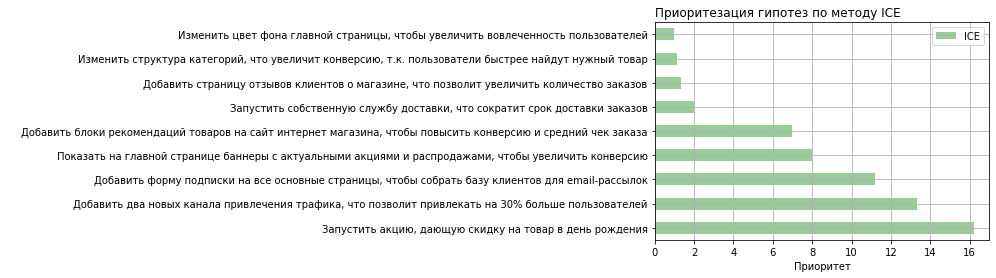

In [33]:
# Построим горизонтальную столбчатую диаграмму 
ax = (hypothesis[['hypothesis', 'ICE']]
      .set_index('hypothesis')
      .sort_values('ICE', ascending=False)
      .plot(kind='barh', color='g', alpha=0.4)
     )
ax.grid(True)
ax.set_xlabel('Приоритет')
ax.set_ylabel(' ')
ax.set_title('Приоритезация гипотез по методу ICE', loc='left')
plt.show()

- Гипотеза с наивысшим ICE: "Запустить акцию, дающую скидку на товар в день рождения клиента" имеет наивысший показатель ICE (16.20). Это обусловлено высокой оценкой по параметрам impact и confidence при относительно низких затратах усилий (efforts).
- Гипотеза с наименьшим ICE: "Изменить цвет фона главной страницы, чтобы увеличить восприятие текста" имеет наименьший показатель ICE (1.00). Это связано с низкими оценками по всем параметрам, несмотря на минимальные усилия.
- Гипотезы с высокими значениями ICE (16.20 и 13.33) имеют высокий impact и confidence при относительно низких затратах усилий.
- Гипотезы с низкими значениями ICE (1.00 и 1.33) имеют низкие оценки по всем параметрам, что делает их менее приоритетными.

**Вывод**

- Гипотезы с высоким ICE следует рассматривать в первую очередь, так как они обещают наибольшую отдачу при относительно низких усилиях: "Запустить акцию, дающую скидку на товар в день рождения",
"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

- Гипотезы с низким ICE имеют меньшую значимость и могут быть отложены или пересмотрены с точки зрения их актуальности и приоритетности.

**Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [34]:
# Проведем расчет RICE
hypothesis['RICE'] = (
    hypothesis['reach'] * hypothesis['impact'] *
    hypothesis['confidence']
) / hypothesis['efforts']

In [35]:
# Отсортируем по убыванию приоритета
hypothesis.sort_values(by='RICE', ascending=False, inplace=True)

In [36]:
# Отобразим df с рассчитанным столбцом RICE
hypothesis 

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


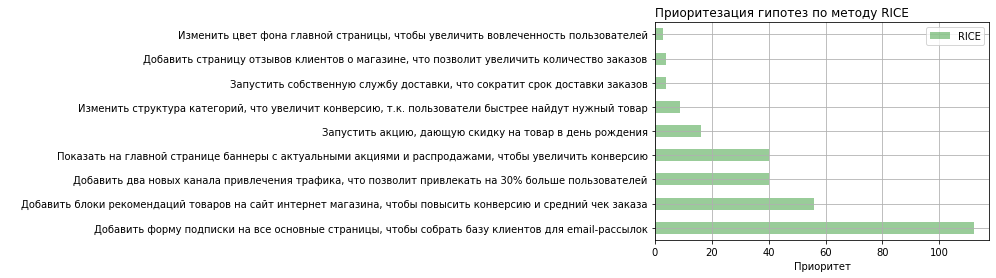

In [37]:
# Построим горизонтальную столбчатую диаграмму 
ax = (hypothesis[['hypothesis', 'RICE']]
      .set_index('hypothesis')
      .sort_values('RICE', ascending=False)
      .plot(kind='barh', color='g', alpha=0.4)
     )
ax.grid(True)
ax.set_xlabel('Приоритет')
ax.set_ylabel(' ')
ax.set_title('Приоритезация гипотез по методу RICE', loc='left')
plt.show()

- Гипотеза с наивысшим RICE: "Добавить форму подписки на все основные страницы сайта" имеет наивысший RICE (112.0). Это связано с высокой оценкой по всем параметрам (reach, impact, confidence) и относительно низкими усилиями (efforts).
- Гипотеза с наименьшим RICE: "Изменить цвет фона главной страницы, чтобы увеличить восприятие текста" имеет наименьший RICE (3.0), так как она получила минимальные оценки по reach, impact, и confidence, несмотря на низкие усилия.
- Аномальные значения могут быть замечены в максимальных значениях параметров reach (10), impact (10), и efforts (10). Эти высокие оценки могут существенно влиять на расчет RICE.

**Вывод**

- Гипотезы с высоким значением RICE следует рассматривать в первую очередь, так как они обещают наибольшую отдачу при относительно низких усилиях: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок","Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".
- Гипотезы с низким значением RICE могут быть отложены или переоценены с точки зрения их актуальности и приоритетности.

**Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.**

- Гипотеза с наивысшим ICE: "Запустить акцию, дающую скидку на товар в день рождения клиента" была на первом месте по ICE с показателем 16.20. По RICE эта гипотеза переместилась на пятое место с показателем 16.2.
- Гипотеза с наивысшим RICE: "Добавить форму подписки на все основные страницы сайта" стала лидером по RICE с показателем 112.0, в то время как по ICE эта гипотеза была на третьем месте с показателем 11.20.
- Гипотезы со значительным изменением приоритета: Гипотеза "Запустить акцию, дающую скидку на товар в день рождения клиента" значительно опустилась в рейтинге при использовании RICE. Гипотеза "Добавить блоки рекомендаций товаров на сайт интернет-магазина" поднялась со среднего места (пятое по ICE) на второе место по RICE.
- Гипотезы с минимальными изменениями: Гипотезы с низким ICE, такие как "Изменить цвет фона главной страницы, чтобы увеличить восприятие текста" и "Добавить страницу отзывов клиентов о магазине", остались на низких местах и при использовании RICE.

**Вывод**

- Таким образом, приоритизация гипотез существенно изменилась при использовании RICE. Гипотезы с высоким значением reach получили более высокие приоритеты, так как этот параметр учитывается в формуле RICE. В результате, гипотезы, которые изначально имели высокий reach, поднялись в рейтинге, тогда как те, у которых reach был низким, даже при высоком impact и confidence, переместились вниз.
- Изменение приоритизации гипотез при использовании RICE вместо ICE произошло из-за включения дополнительного параметра "Reach" (охват), который существенно влияет на расчет приоритета гипотез.
- RICE лучше учитывает реальное влияние гипотез на бизнес, так как включает в расчет количество пользователей, которые будут затронуты.
- Использование RICE помогает выявить гипотезы с широким охватом, которые могут привести к значительным улучшениям ключевых метрик, даже если их влияние на каждого отдельного пользователя не столь велико.

## Анализ A/B-теста

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

Чтобы построить графики по кумулятивным (накапливаемым) данным, необходимо собрать соответствующий агрегированный датафрейм, содержащий информацию о дате, группе (А или В), кумулятивных количестве заказов и пользователей их оформивших, среднем чеке и, наконец, о кумулятивном количестве посетителей магазина.

In [38]:
# Cоздадим массив уникальных пар значений дат и групп теста
dates_grouped = orders[['date', 'group']].drop_duplicates()

# Получим агрегированные кумулятивные по дням данные о заказах 
orders_grouped = dates_grouped.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

orders_grouped.head(6)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
310,2019-08-03,B,61,59,380996


In [39]:
# Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина 

visitors_grouped = dates_grouped.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitors_grouped.head(6)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803


In [40]:
# Объединим кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

cumulative_data = orders_grouped.merge(
    visitors_grouped, 
    left_on=['date', 'group'], 
    right_on=['date', 'group']
)

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [41]:
# Добавим колонку с конверсией
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

In [42]:
# Выведем результат
cumulative_data.head(6)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.03
1,2019-08-01,B,21,20,101217,713,0.03
2,2019-08-02,A,44,38,242401,1338,0.03
3,2019-08-02,B,45,43,266748,1294,0.03
4,2019-08-03,A,68,62,354874,1845,0.04
5,2019-08-03,B,61,59,380996,1803,0.03


Построим графиу куммулятивной выручки по группам

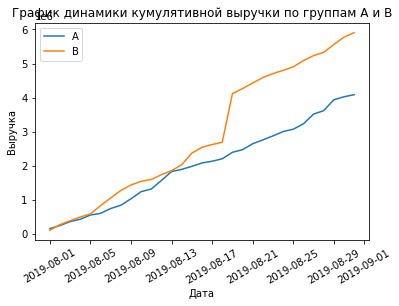

In [43]:
# Построим df с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# Построим df с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('График динамики кумулятивной выручки по группам А и В')
plt.xlabel('Дата')
plt.ylabel("Выручка")
plt.xticks(rotation=30)
plt.legend()
plt.show()

- Кумулятивная выручка группы А растет плавно, и она меньше, чем у группы В.
-  В группе В есть резкий скачок в районе 19 августа 2019 года, что может быть связано с увеличением числа заказов или о появлении дорогих заказов в выборке.    о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

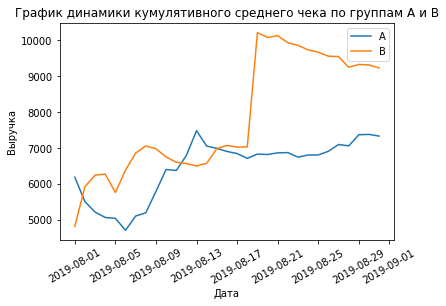

In [44]:
# Построим график динамики кумулятивного среднего чека по группам.
plt.plot(cumulative_revenue_a['date'], 
         cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'],
         label='A')

plt.plot(cumulative_revenue_b['date'], 
         cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'], 
         label='B')

plt.title('График динамики кумулятивного среднего чека по группам А и В')
plt.xlabel('Дата')
plt.ylabel("Выручка")
plt.xticks(rotation=30)
plt.legend()
plt.show()

- Средний  чек в группе А  имеет резкий рост 06 августа 2019 года и 13 августа 2019 года, после чего стабилизировался. 
- Средний чек группы В показал резкий рывок 19 августа 2019 года, что говорит о появлении в выборке дорогих заказов.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

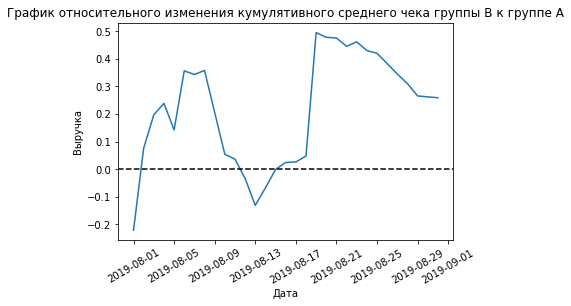

In [45]:
# Соберем  данные в одном датафрейме
cumulative_revenue_ab = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['_a', '_b']
)

# Поcтроим отношение средних чеков
plt.plot(cumulative_revenue_ab['date'], 
         (
             cumulative_revenue_ab['revenue_b']/cumulative_revenue_ab['orders_b']
         )/
         (
             cumulative_revenue_ab['revenue_a']/cumulative_revenue_ab['orders_a']
         )-1
        )

# Добавим ось X

plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=30)
plt.show()

- Всплески показателя среднего чека 04 авгутса 2019 года, 06 августа 2019 года,19 августа 2019 года, что может быть связано с начичием крупных заказов в периоды всплесков показателей.

### Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

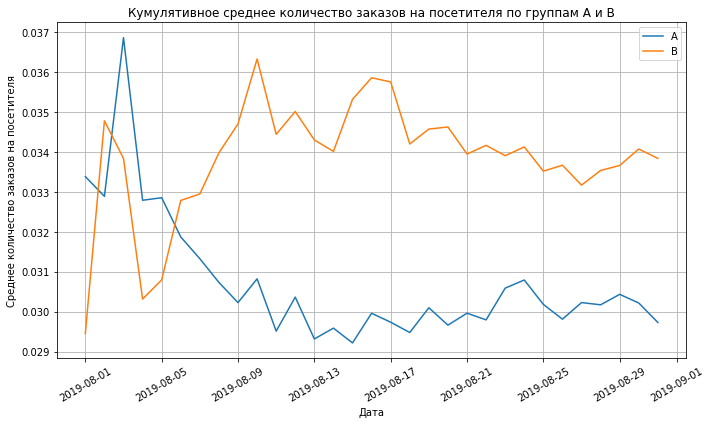

In [46]:
# Выделим данные для групп A и B
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A'].copy()
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B'].copy()

# Рассчитаем кумулятивное среднее количество заказов на посетителя для каждой группы
cumulative_data_a.loc[:, 'average_orders_per_visitor'] = cumulative_data_a['orders'] / cumulative_data_a['visitors']
cumulative_data_b.loc[:, 'average_orders_per_visitor'] = cumulative_data_b['orders'] / cumulative_data_b['visitors']

# Построим графики
plt.figure(figsize=(10, 6))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
plt.title('Кумулятивное среднее количество заказов на посетителя по группам А и В')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()

- До 10 августа 2019 года кумулятивное среднее количество заказов  сильно колебалась, после вровнялась по обеим группам. Это может быть связано с сезонностью товара, рекламными акциями,изменениями в ассортименте.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

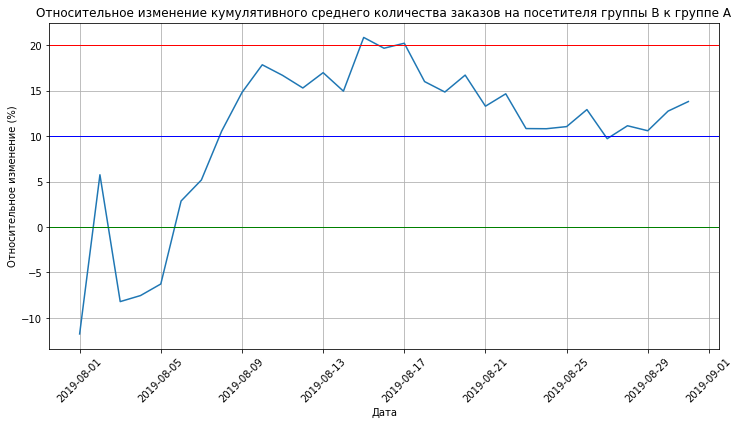

In [47]:
# Объединим данные по группам для удобства анализа
merged_data = cumulative_data_a[['date', 'average_orders_per_visitor']].rename(
    columns={'average_orders_per_visitor': 'A'}
)
merged_data = merged_data.merge(
    cumulative_data_b[['date', 'average_orders_per_visitor']].rename(
        columns={'average_orders_per_visitor': 'B'}
    ),
    on='date'
)

# Рассчитаем относительное изменение B относительно A
merged_data['relative_change'] = (merged_data['B'] - merged_data['A']) / merged_data['A'] * 100

# Построим график относительного изменения
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['relative_change'], label='Относительное изменение B к A (%)')

plt.axhline(0, color='green', linestyle='-', linewidth=1)
plt.axhline(10, color='blue', linestyle='-', linewidth=1, label='10%')
plt.axhline(20, color='red', linestyle='-', linewidth=1, label='20%')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение (%)')
plt.xticks(rotation=45)
plt.grid(True)

- Рассматривая периоды стабильности и колебаний: группа В сначала уступала группе А, 02 августа 2019 года был резкий всплеск относительного кумулятивного среднего количества заказов группы В и после 05 августа 2019 года резкий рост и стабилизация количества заказов, что может быть связано с  долгосрочными изменениями в поведении пользователей или влиянии маркетинговых мероприятий, сезонных факторов, появлением новых товаров. График стабилизировался между 10% и 20%.


### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [48]:
# Проанализируем количество заказов (или транзакций) на одного пользователя. 
orders_by_users = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
orders_by_users.columns =  ['visitorId', 'orders']
display(orders_by_users['orders'].describe())

count    1031.00
mean     1.16   
std      0.72   
min      1.00   
25%      1.00   
50%      1.00   
75%      1.00   
max      11.00  
Name: orders, dtype: float64

- Судя по медиане и 25-м и 75-м процентилям, значительное количество пользователей (75%) сделали только один заказ. Это может указывать на низкий уровень повторных покупок.
- Максимальное значение в 11 заказов указывает на то, что существует группа пользователей, которые значительно превышают средний уровень активности и делают крупные заказы.

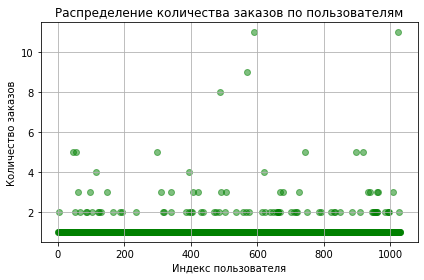

In [49]:
# Создадим последовательность значений x для графика
x_values = pd.Series(range(0,len(orders_by_users)))

# Построим точечную диаграмму
plt.scatter(x_values, orders_by_users['orders'], color='green', alpha=0.5)
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Индекс пользователя')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.tight_layout()
plt.show()


- Значительное количесвто пользователей сделали только один заказ.
- Много пользователей с 2-3 заказами, но не ясна их доля, поэтому сожно понять являются ли данные по ним выбросами.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [50]:
# Вычислим 95-й и 99-й процентили
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

- 95% пользователей сделали 2 или меньше заказов. Это говорит о том, что большинство пользователей находятся в нижней части распределения и делают немного заказов.
- 99% пользователей сделали 4 или меньше заказов. Это показывает, что практически все пользователи, за исключением 1% наиболее активных, сделали не более 4 заказов.
- Большинство пользователей (95%) делают относительно небольшое количество заказов (2 или меньше). Это подтверждает, что большинство пользователей активно не заказывают много.
- Пользователи, которые делают более 4 заказов, составляют лишь 1% от общего числа. Это говорит о наличии небольшой группы пользователей с экстремально высоким уровнем активности.
- Примем за верхнюю границу 4 заказа на одного пользователя.

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

In [51]:
display(orders['revenue'].describe())

count    1.20e+03
mean     8.35e+03
std      3.92e+04
min      5.00e+01
25%      1.22e+03
50%      2.98e+03
75%      8.29e+03
max      1.29e+06
Name: revenue, dtype: float64

- Максимальная стоимость заказа (1,290,000) значительно превышает среднюю стоимость. Это может указывать на наличие нескольких очень больших заказов, которые могут быть выбросами или аномалиями в данных.
- Медиана (2980 единиц) и 25-й/75-й процентиль (1220 и 8290 единиц) показывают, что большинство заказов сосредоточены в диапазоне от 1220 до 8290 единиц.

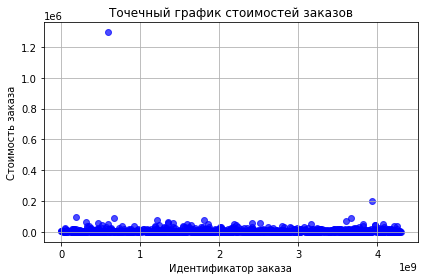

In [52]:
# Построение точечного графика
plt.scatter(orders['transactionId'], orders['revenue'], color='blue', alpha=0.7)
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Идентификатор заказа')
plt.ylabel('Стоимость заказа')
plt.grid(True)
plt.tight_layout()
plt.show()

- График подтверждает наличие одного заказа на 1,29, что является аномалией.

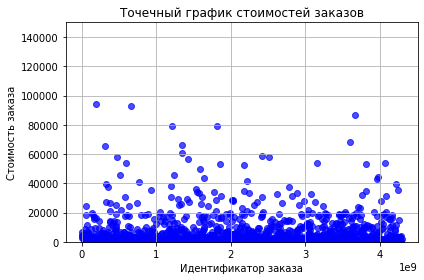

In [53]:
# Построим точечный график без аномалий.
plt.ylim(0, 150000)
plt.scatter(orders['transactionId'], orders['revenue'], color='blue', alpha=0.7)
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Идентификатор заказа')
plt.ylabel('Стоимость заказа')
plt.grid(True)
plt.tight_layout()
plt.show()

- Большая часть  заказов не превышает 20000.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [54]:
# Вычислим 95-q и 99-q процентили
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


- 95% заказов имеют стоимость до 28,000 единиц. Это значение указывает, что 95% всех заказов стоят 28,000 единиц или меньше. Заказы, стоимость которых превышает 28,000 единиц, можно считать относительно высокими.
- 99% заказов имеют стоимость до 58,233.2 единиц. Это значение указывает, что 99% всех заказов стоят 58,233.2 единиц или меньше. Заказы, стоимость которых превышает эту сумму, можно считать крайне высокими или аномальными.
- Определяем границу по величине 99% перцентиля (58233)

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

- Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
- Сформулируем гипотезы: 
- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем между группами есть.

In [55]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
{'date': 'max', 'visitorsPerDateA': 'sum'}
),
axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
{'date': 'max', 'visitorsPerDateB': 'sum'}
),
axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
.groupby('date', as_index=False)
.agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
{'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
),
axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
'date',
'ordersCummulativeA',
'revenueCummulativeA',
]

ordersBDaily = (
orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
.groupby('date', as_index=False)
.agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
{'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
),
axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
'date',
'ordersCummulativeB',
'revenueCummulativeB',
]

data = (
ordersADaily.merge(
ordersBDaily, left_on='date', right_on='date', how='left'
)
.merge(ordersACummulative, left_on='date', right_on='date', how='left')
.merge(ordersBCummulative, left_on='date', right_on='date', how='left')
.merge(visitorsADaily, left_on='date', right_on='date', how='left')
.merge(visitorsBDaily, left_on='date', right_on='date', how='left')
.merge(visitorsACummulative, left_on='date', right_on='date', how='left')
.merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

ordersByUsersA = (
orders[orders['group'] == 'A']
.groupby('visitorId', as_index=False)
.agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
orders[orders['group'] == 'B']
.groupby('visitorId', as_index=False)
.agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')


sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
orders[orders['group'] == 'A']
.groupby('visitorId', as_index=False)
.agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
orders[orders['group'] == 'B']
.groupby('visitorId', as_index=False)
.agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
[
ordersByUsersA['orders'],
pd.Series(
0,
index=np.arange(
data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
),
name='orders',
),
],
axis=0,
)

sampleB = pd.concat(
[
ordersByUsersB['orders'],
pd.Series(
0,
index=np.arange(
data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
),
name='orders',
),
],
axis=0,
)

print("P-значение теста Манна-Уитни: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительное изменение среднего значения между группами B и A: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  24              148579           21               
1 2019-08-02  20              93822            24               
2 2019-08-03  24              112473           16               
3 2019-08-04  16              70825            17               
4 2019-08-05  25              124218           23               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  101217           24                  148579                
1  165531           44                  242401                
2  114248           68                  354874                
3  108571           84                  425699                
4  92428            109                 549917                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  21                  101217               719                
1  45                  266748               619                
2  61                  380996         

- Результат теста Манна-Уитни (p-value): 0.017
- Относительное изменение среднего чека заказа: 0.138
- Поскольку p-value (0.017) меньше уровня значимости  (0.05), нулевая гипотеза ("различий в среднем количестве заказов между группами нет") отвергается.

Вывод.

- Существуют статистически значимые различия в среднем количестве заказов между группами A и B по "сырым" данным.
- Относительное изменение = 0.138 означает, что средний чек заказа во второй группе (или выборке B) больше, чем в первой группе (или выборке A) на 13.8%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

- Посчитаем статистическую значимость различия средних чеков между группами.
- Выведем *p-value* для сравнения средних чеков между группами. Округлим *p-value* до трёх знаков после запятой.
- Выведем относительный прирост среднего чека группы B, округлим до трёх знаков после запятой.
- Сформулируем гипотезы:
- Нулевая: различий в среднем чеке заказа между группами нет.
- Альтернативная: различия в среднем чеке заказов между группами есть.

In [56]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
{'date': 'max', 'visitorsPerDateA': 'sum'}
),
axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
{'date': 'max', 'visitorsPerDateB': 'sum'}
),
axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
.groupby('date', as_index=False)
.agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
{'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
),
axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
'date',
'ordersCummulativeA',
'revenueCummulativeA',
]

ordersBDaily = (
orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
.groupby('date', as_index=False)
.agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
{'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
),
axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
'date',
'ordersCummulativeB',
'revenueCummulativeB',
]

data = (
ordersADaily.merge(
ordersBDaily, left_on='date', right_on='date', how='left'
)
.merge(ordersACummulative, left_on='date', right_on='date', how='left')
.merge(ordersBCummulative, left_on='date', right_on='date', how='left')
.merge(visitorsADaily, left_on='date', right_on='date', how='left')
.merge(visitorsBDaily, left_on='date', right_on='date', how='left')
.merge(visitorsACummulative, left_on='date', right_on='date', how='left')
.merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print("P-значение теста Манна-Уитни: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительное изменение среднего значения между группами B и A: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-значение теста Манна-Уитни: 0.729
Относительное изменение среднего значения между группами B и A: 0.259


- p-value = 0.729: это значение значительно больше уровня значимости 0.05. Следовательно, мы не отвергаем нулевую гипотезу. Это означает, что нет статистически значимых различий в среднем чеке заказа между группами A и B.
- Относительное изменение = 0.259: Это означает, что средний чек заказа в группе B на 25.9% выше, чем в группе A. Однако, несмотря на это значительное изменение, оно не является статистически значимым, как указано выше.

Если p-value > alpha значит средний чек группы B **равен** среднему чеку группы A (или не отличается). Наблюдаемое различие не значимо, получено случайно из-за единичных выбросов.


Вывод.

- Нет статистически значимых различий: различия в среднем чеке заказа между группами A и B не являются статистически значимыми (p-value = 0.729) по "сырым" данным.
- Значительное относительное изменение, но не статистически значимое: хотя средний чек заказа в группе B выше на 25.9%, это изменение не подтверждается статистической значимостью.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

- Так как  95-й и 99-й перцентили средних чеков равны 28000 и 58233.2. А 95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя.
- Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 58233. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% пользователей с дорогими заказами. 
- Сделаем срезы пользователей с числом заказов больше 4 — 'usersWithManyOrders' и пользователей, совершивших заказы дороже 58233 — 'usersWithExpensiveOrders'. Объединим их в таблице 'abnormalUsers', удалим дубликаты, отсортируем по возрастанию. Узнаем сколько всего аномальных пользоватеелй.

In [57]:
ordersByUsersA = (
orders[orders['group'] == 'A']
.groupby('visitorId', as_index=False)
.agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
orders[orders['group'] == 'B']
.groupby('visitorId', as_index=False)
.agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

usersWithManyOrders = pd.concat(
[
ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
],
axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233]['visitorId']
abnormalUsers = (
pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
.drop_duplicates()
.sort_values()
)
print(abnormalUsers.head(5))
abnormalUsers.shape[0]


1099    148427295 
949     887908475 
744     888512513 
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64


15

- Всего 15 аномальных пользователей.

- Посчитаем статистическую значимость различия среднего количества заказов после удаления аномальных пользователей.
- Создадим переменные `sampleAFiltered` и `sampleBFiltered`, в которых сохраним очищенные данные о заказах — не включая аномальных пользователей.
- Выведем *p-value* для сравнения среднего между очищенными группами. Округлим p-value до пяти знаков после запятой. Выведем относительный прирост среднего очищенной группы B, округлив до трёх знаков после запятой.
- Сформулируем гипотезы:
- Нулевая: различий в среднем  количестве заказов на посетителя между группами нет.
- Альтернативная: различия в количестве заказов на посетителя между группами есть.

In [58]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
{'date': 'max', 'visitorsPerDateA': 'sum'}
),
axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
{'date': 'max', 'visitorsPerDateB': 'sum'}
),
axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
.groupby('date', as_index=False)
.agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
{'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
),
axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
'date',
'ordersCummulativeA',
'revenueCummulativeA',
]

ordersBDaily = (
orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
.groupby('date', as_index=False)
.agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
{'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
),
axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
'date',
'ordersCummulativeB',
'revenueCummulativeB',
]

data = (
ordersADaily.merge(
ordersBDaily, left_on='date', right_on='date', how='left'
)
.merge(ordersACummulative, left_on='date', right_on='date', how='left')
.merge(ordersBCummulative, left_on='date', right_on='date', how='left')
.merge(visitorsADaily, left_on='date', right_on='date', how='left')
.merge(visitorsBDaily, left_on='date', right_on='date', how='left')
.merge(visitorsACummulative, left_on='date', right_on='date', how='left')
.merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
orders[orders['group'] == 'A']
.groupby('visitorId', as_index=False)
.agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
orders[orders['group'] == 'B']
.groupby('visitorId', as_index=False)
.agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

usersWithManyOrders = pd.concat(
[
ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
],
axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233]['visitorId']
abnormalUsers = (
pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
.drop_duplicates()
.sort_values()
)

sampleAFiltered = pd.concat(
[
ordersByUsersA[
np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
]['orders'],
pd.Series(
0,
index=np.arange(
data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
),
name='orders',
),
],
axis=0,
)

sampleBFiltered = pd.concat(
[
ordersByUsersB[
np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
]['orders'],
pd.Series(
0,
index=np.arange(
data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
),
name='orders',
),
],
axis=0,
)

print("P-значение теста Манна-Уитни: {0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительное изменение среднего значения между группами B и A: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-значение теста Манна-Уитни: 0.01438
Относительное изменение среднего значения между группами B и A: 0.153


- p-value = 0.014: это значение меньше уровня значимости 0.05. Следовательно, мы отвергаем нулевую гипотезу. Это означает, что существуют статистически значимые различия в среднем количестве заказов на посетителя между группами A и B.
- Относительное изменение = 0.153: это означает, что среднее количество заказов на посетителя в группе B на 15.3% выше, чем в группе A.

Вывод. 

- Статистически значимые различия: различия в среднем количестве заказов на посетителя между группами A и B являются статистически значимыми (p-value < 0.05) по "очищенным" данным.
- Увеличение среднего количества заказов: среднее количество заказов на посетителя в группе B на 15.3% выше, чем в группе A.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

- Узнаем, как действия аномальных пользователей повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.
- Сформулируем гипотезы:
- Нулевая: различий в среднем  чеке заказа  между группами нет.
- Альтернативная: различия в в среднем  чеке заказа  между группами есть.

In [59]:
print(
    "P-значение теста Манна-Уитни: {0:.3f}".format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительное изменение среднего значения между группами B и A: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-значение теста Манна-Уитни: 0.851
Относительное изменение среднего значения между группами B и A: -0.006


- p-value = 0.851: это значение значительно больше уровня значимости 0.05.Следовательно, мы не отвергаем нулевую гипотезу. Это означает, что нет статистически значимых различий в среднем количестве заказов на посетителя между группами A и B по "очищенным" данным.
- Относительное изменение = -0.006: это означает, что среднее количество заказов на посетителя в группе B на 0.6% ниже, чем в группе A. Однако это изменение не является статистически значимым.

Вывод.

Нет статистически значимых различий в среднем количестве заказов на посетителя между группами A и B по очищенным данным.

### Примем решение по результатам теста и объясним его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Имеющиеся факты:
1. Среднее количество заказов на посетителя по сырым данным: 
- p-value: 0.017
- Относительное изменение: 0.138 (13.8%)
- Существуют статистически значимые различия в среднем количестве заказов на посетителя между группами A и B (p-value < 0.05).
- Среднее количество заказов на посетителя в группе B на 13.8% выше, чем в группе A.
Вывод: существуют статистически значимые различия в среднем количестве заказов на посетителя между группами A и B по сырым данным.

2. Средний чек заказа по сырым данным: 
- p-value: 0.729.Следовательно, мы не отвергаем нулевую гипотезу. Это означает, что нет статистически значимых различий в среднем чеке заказа между группами A и B.
- Относительное изменение: 0.259 (25.9%). Это означает, что средний чек заказа в группе B на 25.9% выше, чем в группе A. 
- Различия в среднем чеке заказа между группами A и B не являются статистически значимыми (p-value > 0.05).
- Средний чек заказа в группе B выше на 25.9%, но это изменение не подтверждается статистической значимостью.
Вывод: нет статистически значимых различий в среднем чеке заказа между группами A и B по сырым данным.

3. Среднее количество заказов на посетителя по очищенным данным:
- p-value = 0.014: это значение меньше уровня значимости 0.05. Следовательно, мы отвергаем нулевую гипотезу. Это означает, что существуют статистически значимые различия в среднем количестве заказов на посетителя между группами A и B.
- Относительное изменение = 0.153: это означает, что среднее количество заказов на посетителя в группе B на 15.3% выше, чем в группе A.
Вывод:  различия в среднем количестве заказов на посетителя между группами A и B являются статистически значимыми (p-value < 0.05) по "очищенным" данным. 

4. Средний чек заказа по очищенным данным:
- p-value: 0.851
- Относительное изменение: -0.006 (-0.6%)
- Нет статистически значимых различий в среднем количестве заказов на посетителя между группами A и B по очищенным данным (p-value > 0.05).
- Среднее количество заказов на посетителя в группе B на 0.6% ниже, чем в группе A, но это изменение не является статистически значимым.
Вывод: нет статистически значимых различий в среднем количестве заказов на посетителя между группами A и B по очищенным данным.

1. По сырым данным:
Результат: Среднее количество заказов на посетителя в группе B значительно выше, чем в группе A, и это изменение статистически значимо (p-value = 0.017). Однако, изменения в среднем чеке заказа не подтверждаются статистической значимостью (p-value = 0.729).
2. По очищенным данным:
Результат: Среднее количество заказов на посетителя в группе B по очищенным данным также статистически значимо выше на 15.3% по сравнению с группой A (p-value = 0.014). В то же время, средний чек заказа в группе B на 0.6% ниже, и это изменение не является статистически значимым (p-value = 0.851).

Решение:

- Прекратить тест и зафиксировать победу группы B по метрике среднего количества заказов на посетителя.

Обоснование:

- По очищенным данным, различия в среднем количестве заказов на посетителя между группами A и B являются статистически значимыми (p-value = 0.014). Среднее количество заказов на посетителя в группе B на 15.3% выше, что свидетельствует о реальном улучшении в данной метрике.
Поскольку изменения в среднем чеке заказа не являются статистически значимыми по обеим версиям данных, это не поддерживает необходимость изменения или корректировки в этой метрике.

Вывод: 

- На основе статистически значимых различий в среднем количестве заказов на посетителя и отсутствии статистических различий в среднем чеке заказа, тест следует прекратить. Группа B показала значительное улучшение в количестве заказов на посетителя, и это изменение подтверждено статистически. Средний чек заказа, несмотря на его незначительное увеличение в группе B, не требует изменений.

## Вывод


На основании входных данных, предоставленных интернет-магазином был проведено исследование и вынесены рекомендации, изложенные ниже.

1. В части приоритизации гипотез из списка, предоставленных отделом Маркетинга следует в первую очередь обратить внимание на гипотезы:

- "Запустить акцию, дающую скидку на товар в день рождения",
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";


Если ранжирование гипотез должно включать в себя широкий охват пользователей, то места необходимо распределить таким образом:

- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",
- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".

2. В части анализа А/В теста:

- На основе статистически значимых различий в среднем количестве заказов на посетителя и отсутствии статистических различий в среднем чеке заказа, тест следует прекратить. 
- Группа B показала значительное улучшение в количестве заказов на посетителя, и это изменение подтверждено статистически. 
- Средний чек заказа, несмотря на его незначительное увеличение в группе B, не требует изменений.